In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score,recall_score,f1_score,accuracy_score,
                             confusion_matrix, classification_report)
import joblib

In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
df =pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
print(df.shape)
print(df.info())

(918, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
Age               918 non-null int64
Sex               918 non-null object
ChestPainType     918 non-null object
RestingBP         918 non-null int64
Cholesterol       918 non-null int64
FastingBS         918 non-null int64
RestingECG        918 non-null object
MaxHR             918 non-null int64
ExerciseAngina    918 non-null object
Oldpeak           918 non-null float64
ST_Slope          918 non-null object
HeartDisease      918 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# **EDA**

---


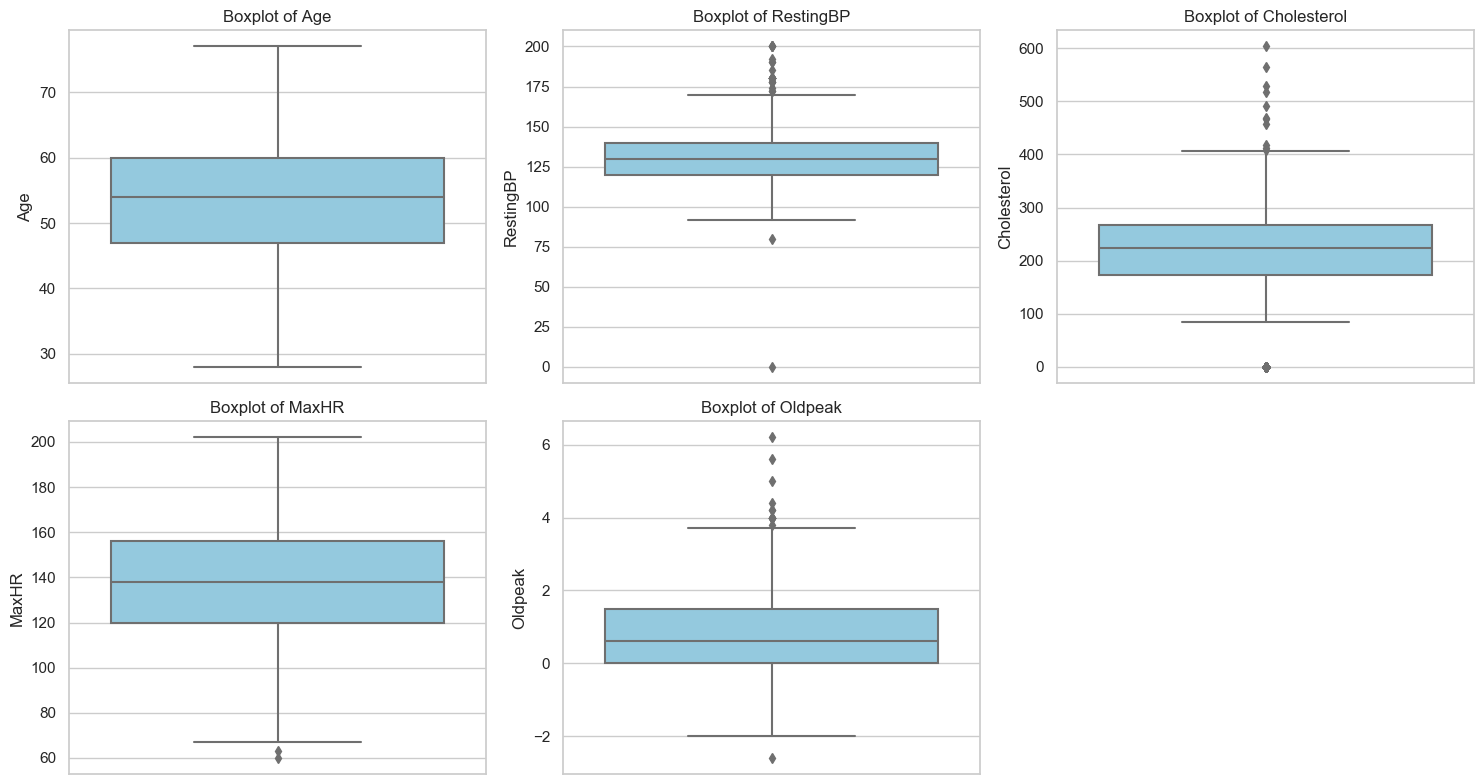

In [8]:
sns.set(style="whitegrid")

numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(15, 8))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [9]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'Number of outliers in {col}: {len(outliers)}')

Number of outliers in Age: 0
Number of outliers in RestingBP: 28
Number of outliers in Cholesterol: 183
Number of outliers in MaxHR: 2
Number of outliers in Oldpeak: 16


In [10]:
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

In [11]:
X = pd.get_dummies(X)
columns = X.columns
joblib.dump(columns, "model_columns.pkl")


['model_columns.pkl']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **LOGISTIC REGRESSION (CLASSIFICATION)**

In [14]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000)

In [15]:
y_pred = lr_model.predict(X_test_scaled)

In [16]:
accuracy = accuracy_score(y_test,y_pred)
print('Model Accuracy is: ',accuracy)

Model Accuracy is:  0.8532608695652174


In [17]:
confusionMatrix = confusion_matrix(y_test,y_pred)
print("Model Confusion Matrix is: ",confusionMatrix)

Model Confusion Matrix is:  [[67 10]
 [17 90]]


In [18]:
print("Classification Report of the model is:\n ",classification_report(y_test,y_pred))

Classification Report of the model is:
                precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



# **RANDOM FOREST**

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf_model = RandomForestClassifier(random_state=42)

In [21]:
rf_model.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=42)

In [22]:
rf_pred = rf_model.predict(X_test_scaled)

In [23]:
print("Accuracy of Random Forest is: ",accuracy_score(y_test,rf_pred))
print("Classification Report of Random Forest is:\n ",classification_report(y_test,rf_pred))

Accuracy of Random Forest is:  0.8804347826086957
Classification Report of Random Forest is:
                precision    recall  f1-score   support

           0       0.85      0.87      0.86        77
           1       0.90      0.89      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [24]:
print("Confusion matrix of Random Forest is: ",confusion_matrix(y_test,rf_pred))

Confusion matrix of Random Forest is:  [[67 10]
 [12 95]]


# **XGBoost**

In [25]:
import xgboost as xgb

In [26]:
xgb_model = xgb.XGBClassifier(random_state=42)

In [27]:
xgb_model.fit(X_train_scaled,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [28]:
xg_pred = xgb_model.predict(X_test_scaled)

In [29]:
print("Accuracy of XGBoost is: ",accuracy_score(y_test,xg_pred))
print("Confusion Matrix of XGBoost is: ",confusion_matrix(y_test,xg_pred))
print("Classification Report of XGBoost is: ",classification_report(y_test,xg_pred))

Accuracy of XGBoost is:  0.875
Confusion Matrix of XGBoost is:  [[69  8]
 [15 92]]
Classification Report of XGBoost is:                precision    recall  f1-score   support

           0       0.82      0.90      0.86        77
           1       0.92      0.86      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



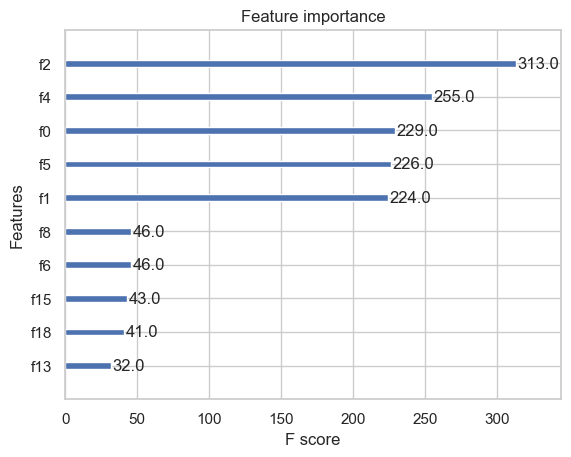

In [30]:

xgb.plot_importance(xgb_model, max_num_features=10)
plt.show()


In [31]:



joblib.dump(xgb_model, "heart_disease_model.pkl")

print("✅ Model saved successfully!")

model = joblib.load("heart_disease_model.pkl")




✅ Model saved successfully!


In [32]:
# joblib.dump(rf_model, "heart_disease_modelRF.pkl")


# model = joblib.load("heart_disease_modelRF.pkl")

In [33]:
# joblib.dump(lr_model, "heart_disease_modelLR.pkl")


# model = joblib.load("heart_disease_modelLR.pkl")